In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
df =pd.read_csv('/content/testset.csv')

In [3]:
df

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [4]:
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.lstrip()

In [5]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [6]:
df.shape

(100990, 20)

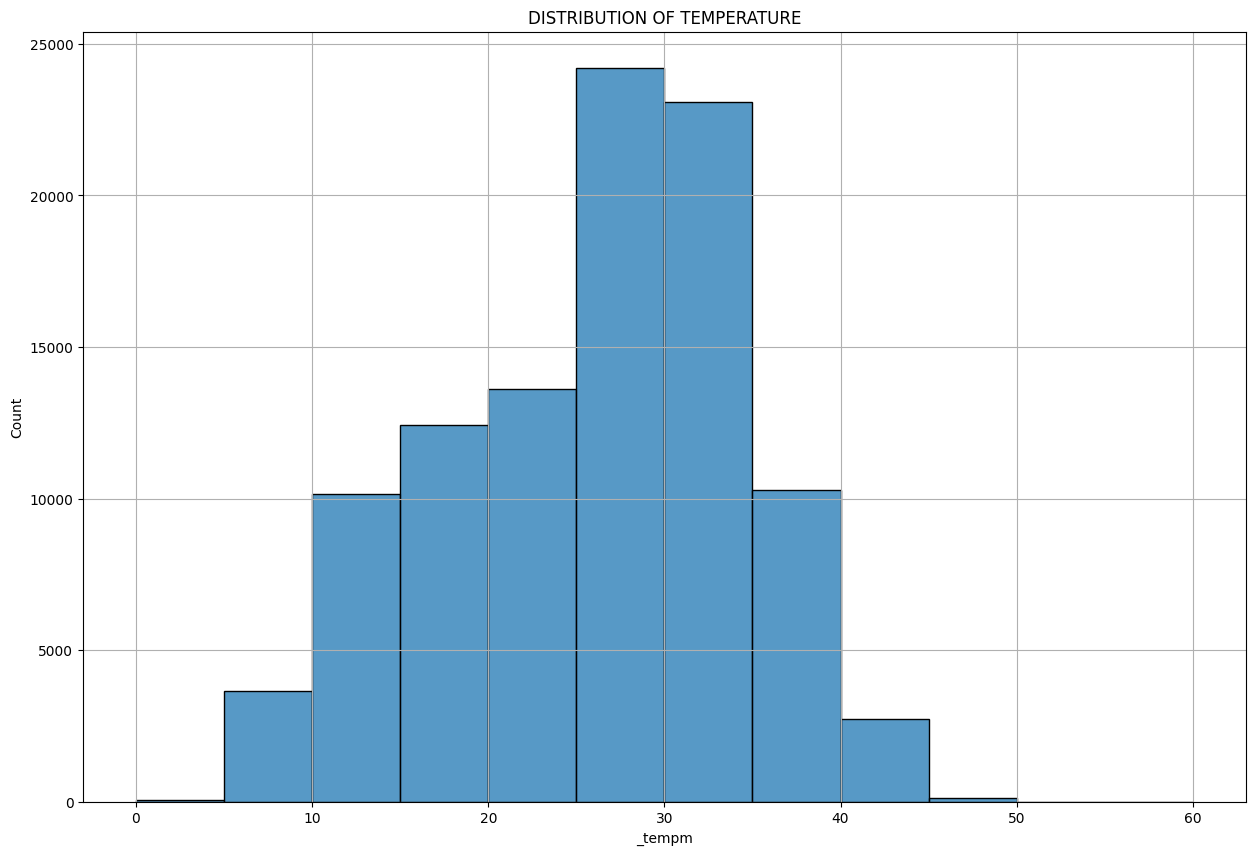

In [9]:
plt.figure(figsize=(15,10))
sns.histplot(df['_tempm'], bins=[i for i in range(0,61,5)], kde=False)
plt.title("DISTRIBUTION OF TEMPERATURE")
plt.grid()
plt.show()

In [11]:
df.index = pd.to_datetime(df.datetime_utc)
required_cols =['_dewptm', '_fog','_hail','_hum','_rain','_snow','_tempm', '_thunder', '_tornado']
df = df[required_cols]
df.head()


,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0


In [12]:
df.isnull().sum()

_dewptm     621
_fog          0
_hail         0
_hum        757
_rain         0
_snow         0
_tempm      673
_thunder      0
_tornado      0
dtype: int64

In [14]:
df= df.fillna(method ='ffill')


In [15]:
df

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0
...,...,...,...,...,...,...,...,...,...
2017-04-24 06:00:00,17.0,0,0,25.0,0,0,34.0,0,0
2017-04-24 09:00:00,14.0,0,0,16.0,0,0,38.0,0,0
2017-04-24 12:00:00,12.0,0,0,14.0,0,0,36.0,0,0


In [16]:


df_final = df.resample('D').mean()
df_final.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,48.625000,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,55.958333,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,48.055556,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,29.400000,0.0,0.0,27.800000,0.0,0.0


In [17]:
df_final = df_final.fillna(method='ffill')

In [18]:
df_final.isnull().sum()

_dewptm     0
_fog        0
_hail       0
_hum        0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

In [20]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_final)

In [21]:
scaled_data

array([[0.44471154, 0.        , 0.        , ..., 0.46387643, 0.        ,
        0.        ],
       [0.40784486, 0.        , 0.        , ..., 0.48044345, 0.        ,
        0.        ],
       [0.45615292, 0.        , 0.        , ..., 0.44849278, 0.        ,
        0.        ],
       ...,
       [0.71116864, 0.        , 0.        , ..., 0.76397608, 0.2       ,
        0.        ],
       [0.55022652, 0.        , 0.        , ..., 0.76326607, 0.        ,
        0.        ],
       [0.5420541 , 0.        , 0.        , ..., 0.73841555, 0.        ,
        0.        ]])

In [24]:
sequence_length = 10
num_features = len(df_final.columns)

sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][6]  # '_tempm' column index
    sequences.append(seq)
    labels.append(label)


In [27]:
sequences = np.array(sequences)
labels = np.array(labels)

In [28]:
train_size = int(0.8*len(sequences))
x_train,x_test = sequences[:train_size], sequences[train_size:]
y_train,y_test = labels[:train_size], labels[train_size:]

In [31]:
print("TRAIN X_SHAPE :",x_train.shape)
print("TRAIN Y_SHAPE :",y_train.shape)
print("TEST X_SHAPE :",x_test.shape)
print("TEST Y_SHAPE :",y_test.shape)

TRAIN X_SHAPE : (5976, 10, 9)
TRAIN Y_SHAPE : (5976,)
TEST X_SHAPE : (1494, 10, 9)
TEST Y_SHAPE : (1494,)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [37]:
model = Sequential()

In [39]:
model.add(LSTM(units=128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           70656     
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [44]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/best_model_weights.h5', monitor='val_loss', save_best_only=True)
# Train the model
history = model.fit(
    x_train,y_train,
    epochs=200,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/200
75/75 [==============================] - 1s 9ms/step - loss: 0.0099 - val_loss: 0.0048
Epoch 2/200
14/75 [====>.........................] - ETA: 0s - loss: 0.0091

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 1s 9ms/step - loss: 0.0093 - val_loss: 0.0042
Epoch 3/200
75/75 [==============================] - 1s 9ms/step - loss: 0.0087 - val_loss: 0.0048
Epoch 4/200
75/75 [==============================] - 1s 9ms/step - loss: 0.0085 - val_loss: 0.0040
Epoch 5/200
75/75 [==============================] - 1s 9ms/step - loss: 0.0085 - val_loss: 0.0039
Epoch 6/200
75/75 [==============================] - 1s 8ms/step - loss: 0.0075 - val_loss: 0.0048
Epoch 7/200
75/75 [==============================] - 1s 9ms/step - loss: 0.0077 - val_loss: 0.0037
Epoch 8/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0072 - val_loss: 0.0037
Epoch 9/200
75/75 [==============================] - 1s 9ms/step - loss: 0.0069 - val_loss: 0.0035
Epoch 10/200
75/75 [==============================] - 1s 8ms/step - loss: 0.0068 - val_loss: 0.0037
Epoch 11/200
75/75 [==============================] - 1s 9ms/step - loss: 0.0066 - val_loss: 0.0034
Epoch 12/200
75/75 

In [46]:
best_model = tf.keras.models.load_model('/content/best_model_weights.h5')
test_loss = best_model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)


47/47 [==============================] - 1s 4ms/step - loss: 0.0023
Test Loss: 0.002277209423482418


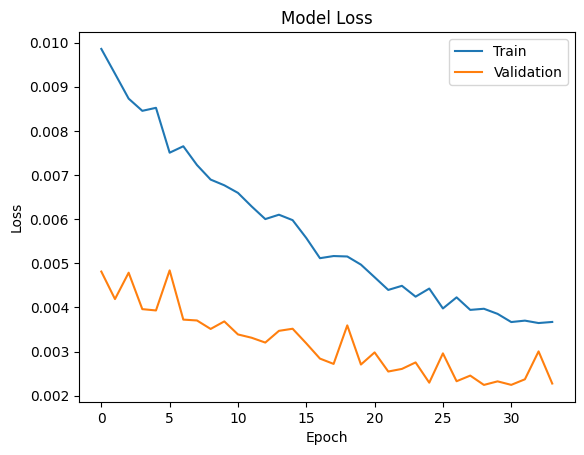

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'best_model' contains your trained model and you want to predict on 'x_test'
predictions = best_model.predict(x_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


47/47 [==============================] - 1s 3ms/step
Mean Absolute Error (MAE): 0.03751667740161806
Mean Squared Error (MSE): 0.002277209284626162
Root Mean Squared Error (RMSE): 0.04772011404665921


47/47 [==============================] - 0s 5ms/step


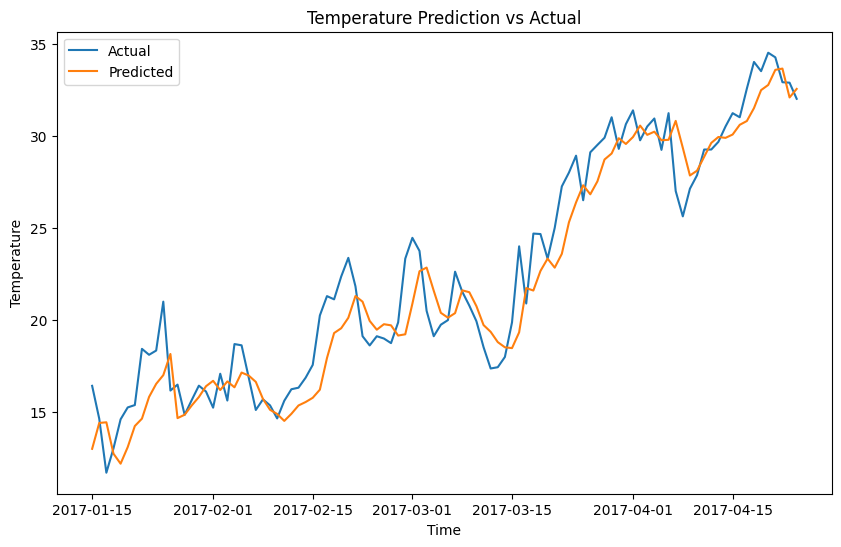

In [54]:
# Assuming 'x_train', 'x_test', 'y_train', 'y_test' are your train and test data
test_y_copies = np.repeat(y_test.reshape(-1, 1), x_test.shape[-1], axis=-1)
true_temp = scaler.inverse_transform(test_y_copies)[:, 6]

# Predicted values
prediction = best_model.predict(x_test)
prediction_copies = np.repeat(prediction, 9, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:, 6]

# Plotting predicted and actual temperatures
plt.figure(figsize=(10, 6))
plt.plot(df_final.index[-100:], true_temp[-100:], label='Actual')
plt.plot(df_final.index[-100:], predicted_temp[-100:], label='Predicted')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()
